In [1]:
from nltk.tokenize import sent_tokenize, word_tokenize
from nltk import pos_tag
from nltk.stem import PorterStemmer
from nltk import WordNetLemmatizer
from nltk.corpus import movie_reviews
from nltk.corpus import stopwords
import sentencepiece
import nltk
nltk.download('stopwords')
from collections import Counter
import pandas
import matplotlib.pyplot as plt
import numpy as np
import pandas as pd
import os 
from sklearn.metrics import classification_report
from transformers import TFAlbertModel
from transformers import TFRobertaModel
from transformers import TFDistilBertModel
from transformers import AlbertTokenizer
from transformers import RobertaTokenizer
from transformers import DistilBertTokenizer
import glob
from transformers import *
nltk.download('punkt')
nltk.download('wordnet')

[nltk_data] Downloading package stopwords to
[nltk_data]     C:\Users\user\AppData\Roaming\nltk_data...
[nltk_data]   Package stopwords is already up-to-date!
[nltk_data] Downloading package punkt to
[nltk_data]     C:\Users\user\AppData\Roaming\nltk_data...
[nltk_data]   Package punkt is already up-to-date!
[nltk_data] Downloading package wordnet to
[nltk_data]     C:\Users\user\AppData\Roaming\nltk_data...
[nltk_data]   Package wordnet is already up-to-date!


True

In [2]:
import patoolib
import os

os.environ['TF_CPP_MIN_LOG_LEVEL'] = '3'
import warnings  # To ignore any warnings

warnings.filterwarnings("ignore")
import os
import glob
import numpy as np
import itertools
import pandas as pd

# Audio
import librosa
import librosa.display

# Scikit learn
from sklearn.model_selection import train_test_split
from sklearn.metrics import classification_report, accuracy_score, confusion_matrix
from sklearn.preprocessing import LabelEncoder
from sklearn.utils import shuffle
from sklearn.utils import class_weight

# Keras
import keras
from keras.models import Sequential
from keras.layers import Dense, Dropout, Activation, Flatten
from keras.layers import Convolution2D, Conv2D, MaxPooling2D, GlobalAveragePooling2D
from keras.utils import to_categorical
import warnings

Using TensorFlow backend.


# Preprocessing

In [99]:
INPUT_DIR = 'D:/studies7/Natural_Language_processing/MAIN_PROJECT/dataset/**'
 
dataset = []
for filename in glob.iglob(INPUT_DIR):
    kolkuPoKlasa=0
    print(filename)
    for f in glob.iglob(filename+'/**'):
        
        if (kolkuPoKlasa>500):
            kolkuPoKlasa=0
            break
        if os.path.exists(f):
            label = os.path.basename(filename)
            duration = librosa.get_duration(filename=f)
            #print('label', f, 'duration', duration)
           
            if duration >= 4.0:
                kolkuPoKlasa+=1
                #slice_size = 3
                #iterations = int((duration - slice_size) / (slice_size - 1))
                iterations = 1
                #initial_offset = (duration - ((iterations * (slice_size - 1)) + 1)) / 2
                for i in range(iterations):
                    #offset = initial_offset + i * (slice_size - 1)
                    offset = 0
                    if (label == "finish"):
                        dataset.append({
                            "filename": f,
                            "label": "finish",
                            "offset": offset
                        })
                    elif (label == "georgian"):
                        dataset.append({
                            "filename": f,
                            "label": "georgian",
                            "offset": offset
                        })
                    elif (label == "hungarian"):
                        dataset.append({
                            "filename": f,
                            "label": "hungarian",
                            "offset": offset
                        })
                    elif (label == "japanese"):
                        dataset.append({
                            "filename": f,
                            "label": "japanese",
                            "offset": offset
                        })
                    elif (label == "ltalian"):
                        dataset.append({
                            "filename": f,
                            "label": "ltalian",
                            "offset": offset
                        })
                    elif (label == "slovenian"):
                        dataset.append({
                            "filename": f,
                            "label": "slovenian",
                            "offset": offset
                        })
                    elif (label == "swedish"):
                        dataset.append({
                            "filename": f,
                            "label": "swedish",
                            "offset": offset
                        })
                    elif (label == "thai"):
                        dataset.append({
                            "filename": f,
                            "label": "thai",
                            "offset": offset
                        })
                    elif (label == "greek"):
                        dataset.append({
                            "filename": f,
                            "label": "greek",
                            "offset": offset
                        })
                    else:
                        dataset.append({
                            "filename": f,
                            "label": "viatnamese",
                            "offset": offset
                        })
        
print('dlzina na dataset: ',len(dataset))


D:/studies7/Natural_Language_processing/MAIN_PROJECT/dataset\finish
D:/studies7/Natural_Language_processing/MAIN_PROJECT/dataset\georgian
D:/studies7/Natural_Language_processing/MAIN_PROJECT/dataset\greek
D:/studies7/Natural_Language_processing/MAIN_PROJECT/dataset\hungarian
D:/studies7/Natural_Language_processing/MAIN_PROJECT/dataset\japanese
D:/studies7/Natural_Language_processing/MAIN_PROJECT/dataset\ltalian
D:/studies7/Natural_Language_processing/MAIN_PROJECT/dataset\slovenian
D:/studies7/Natural_Language_processing/MAIN_PROJECT/dataset\swedish
D:/studies7/Natural_Language_processing/MAIN_PROJECT/dataset\thai
D:/studies7/Natural_Language_processing/MAIN_PROJECT/dataset\viatnamese
dlzina na dataset:  5010


In [100]:
dataset = pd.DataFrame(dataset)
dataset = shuffle(dataset, random_state=42)
dataset.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 5010 entries, 1052 to 860
Data columns (total 3 columns):
filename    5010 non-null object
label       5010 non-null object
offset      5010 non-null int64
dtypes: int64(1), object(2)
memory usage: 156.6+ KB


In [101]:
print(len(dataset),' pred')
# naoganje i brishenje na prazni samples
nuli = []
for i in range(0,len(dataset)):
  y,sr = librosa.load(dataset.filename.iloc[i], duration=4.0)
  if y.any() == 0:
    nuli.append(i)
print(nuli)


5010  pred
[523, 680, 1474, 1568, 1951, 2863, 2926, 3588, 4011, 4320]


In [102]:
dataset = dataset.drop(index=nuli)
print('po izbrisheni dolzijna',len(dataset))

po izbrisheni dolzijna 5000


In [103]:
train, test = train_test_split(dataset, test_size=0.25, random_state=42)

print("Train: %i" % len(train))
print("Test: %i" % len(test))

Train: 3750
Test: 1250


In [105]:
x_train = []
x_test = []

for idx in range(len(train)):
    x_train.append(extract_features(train.filename.iloc[idx],train.offset.iloc[idx]))

for idx in range(len(test)):
    x_test.append(extract_features(test.filename.iloc[idx],test.offset.iloc[idx]))
    
x_test = np.asarray(x_test)
x_train = np.asarray(x_train)

print("X train:", x_train.shape)
print("X test:", x_test.shape)

X train: (3750, 25)
X test: (1250, 25)


In [106]:

y_train = encoder.fit_transform(train.label)
y_test = encoder.fit_transform(test.label)

# Compute class weights
class_weights = class_weight.compute_class_weight('balanced',np.unique(y_train),y_train)

In [107]:
from sklearn.preprocessing import LabelEncoder, StandardScaler
scaler = StandardScaler()
x_train = scaler.fit_transform(np.array(x_train, dtype = float))
x_test = scaler.fit_transform(np.array(x_test, dtype = float))
print(x_train.shape)
print(y_train.shape)
print(x_test.shape)
print(y_test.shape)

(3750, 25)
(3750,)
(1250, 25)
(1250,)


In [128]:
def confusion_matrix(cm, classes,
                          title='Confusion matrix',
                          cmap=plt.cm.Blues):
   
    plt.imshow(cm, interpolation='nearest', cmap=cmap)
    plt.title(title)
    plt.colorbar()
    tick_marks = np.arange(len(classes))
    plt.xticks(tick_marks, classes, rotation=45)
    plt.yticks(tick_marks, classes)

    thresh = cm.max() / 2.
    for i, j in itertools.product(range(cm.shape[0]), range(cm.shape[1])):
        plt.text(j, i, cm[i, j],
                 horizontalalignment="center",
                 color="white" if cm[i, j] > thresh else "black")

    plt.tight_layout()
    plt.ylabel('True label')
    plt.xlabel('Predicted label')

def plot_cnf(model,dataset_x,dataset_y,klasi):
    import sklearn
    true_y=dataset_y
    true_x=dataset_x
    pred=model.predict(true_x)

    print("---------------PERFORMANCE ANALYSIS FOR THE MODEL----------------\n")

    print("Real Test dataset labels: \n{}\n".format(true_y))
    print("Predicted Test dataset labels: \n{}".format(pred))

    cnf_matrix=sklearn.metrics.confusion_matrix(true_y,pred)
    plt.figure()
    a=confusion_matrix(cnf_matrix,classes=klasi,title='Confusion matrix')
    return pred,true_y

In [109]:
def extract_features(audio_path,offset):

    y, sr = librosa.load(audio_path, offset=offset, duration=4.0)

    
    chroma_stft = librosa.feature.chroma_stft(y=y, sr=sr)
    spec_cent = librosa.feature.spectral_centroid(y=y, sr=sr)
    spec_bw = librosa.feature.spectral_bandwidth(y=y, sr=sr)
    rolloff = librosa.feature.spectral_rolloff(y=y, sr=sr)
    zcr = librosa.feature.zero_crossing_rate(y)
    mfcc = librosa.feature.mfcc(y=y, sr=sr)

    vector = np.empty
    vector = np.append(vector, np.mean(chroma_stft))
    vector = np.append(vector, np.mean(spec_cent))
    vector = np.append(vector,np.mean(spec_bw))
    vector = np.append(vector,np.mean(rolloff))
    vector = np.append(vector,np.mean(zcr))
    for e in mfcc:
            vector = np.append(vector,np.mean(e))

    vector = np.delete(vector,0,0)


    return vector

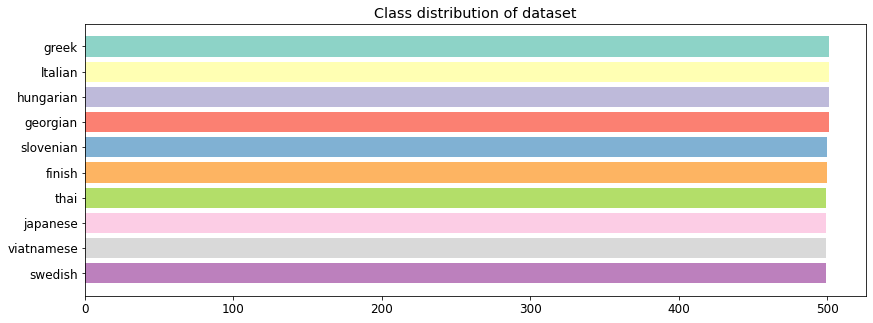

In [110]:
import matplotlib
matplotlib.rcParams['figure.figsize'] = (14, 5)
matplotlib.rcParams['font.size'] = 12
from matplotlib import pyplot as plt

num_classes = 10
class_counts = dataset.label.value_counts()
cmap = plt.cm.get_cmap(plt.cm.Set3, 10)
colors = [cmap(i) for i in range(num_classes)]
plt.barh(range(num_classes)[::-1], class_counts, tick_label=dataset.label.unique(),
         color=colors)
plt.title('Class distribution of dataset')
plt.show()

# KNN Model

3 [0.9288]
4 [0.9288, 0.92]
5 [0.9288, 0.92, 0.9144]
6 [0.9288, 0.92, 0.9144, 0.9104]
7 [0.9288, 0.92, 0.9144, 0.9104, 0.9032]
8 [0.9288, 0.92, 0.9144, 0.9104, 0.9032, 0.8952]
9 [0.9288, 0.92, 0.9144, 0.9104, 0.9032, 0.8952, 0.8864]
10 [0.9288, 0.92, 0.9144, 0.9104, 0.9032, 0.8952, 0.8864, 0.8848]
11 [0.9288, 0.92, 0.9144, 0.9104, 0.9032, 0.8952, 0.8864, 0.8848, 0.8816]
12 [0.9288, 0.92, 0.9144, 0.9104, 0.9032, 0.8952, 0.8864, 0.8848, 0.8816, 0.8736]
13 [0.9288, 0.92, 0.9144, 0.9104, 0.9032, 0.8952, 0.8864, 0.8848, 0.8816, 0.8736, 0.8712]
14 [0.9288, 0.92, 0.9144, 0.9104, 0.9032, 0.8952, 0.8864, 0.8848, 0.8816, 0.8736, 0.8712, 0.8664]
Max Accuracy is 0.929 on test dataset with 3 neighbors.

Training Score: 0.969
Test score: 0.929
---------------PERFORMANCE ANALYSIS FOR THE MODEL----------------

Real Test dataset labels: 
[4 7 2 ... 4 7 4]

Predicted Test dataset labels: 
[4 7 2 ... 4 7 1]


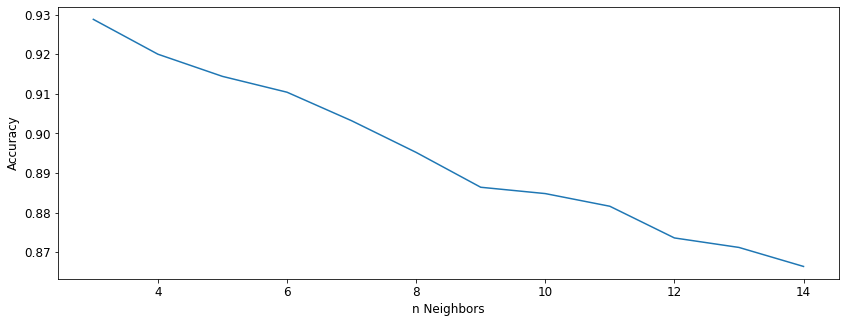

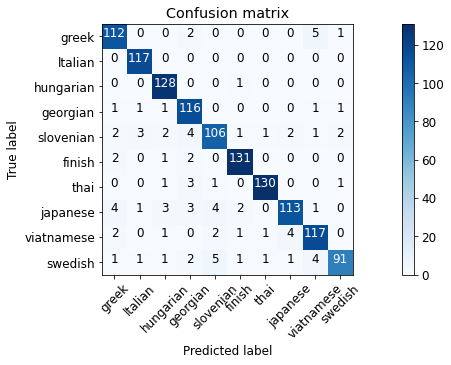

In [129]:
from sklearn.neighbors import KNeighborsClassifier

results_knn=[]
for i in range(3,15):
    knn=KNeighborsClassifier(n_neighbors=i)
    knn.fit(x_train,y_train)
    results_knn.append(knn.score(x_test,y_test))
    print(i,results_knn)
    
max_accuracy_knn=max(results_knn)
best_k=3+results_knn.index(max(results_knn))
print("Max Accuracy is {:.3f} on test dataset with {} neighbors.\n".format(max_accuracy_knn,best_k))

plt.plot(np.arange(3,15),results_knn)
plt.xlabel("n Neighbors")
plt.ylabel("Accuracy")


knn=KNeighborsClassifier(n_neighbors=best_k)
knn.fit(x_train,y_train)
print("Training Score: {:.3f}".format(knn.score(x_train,y_train)))
print("Test score: {:.3f}".format(knn.score(x_test,y_test)))  

pred,true_y = plot_cnf(knn,x_test,y_test,dataset.label.unique())

In [130]:
print(classification_report(pred, true_y))

              precision    recall  f1-score   support

           0       0.93      0.90      0.92       124
           1       1.00      0.95      0.97       123
           2       0.99      0.93      0.96       138
           3       0.96      0.88      0.92       132
           4       0.85      0.90      0.88       118
           5       0.96      0.96      0.96       137
           6       0.96      0.98      0.97       133
           7       0.86      0.94      0.90       120
           8       0.91      0.91      0.91       129
           9       0.84      0.95      0.89        96

    accuracy                           0.93      1250
   macro avg       0.93      0.93      0.93      1250
weighted avg       0.93      0.93      0.93      1250



# Random Forest Model

Max Accuracy is 0.874 on test dataset with 85 estimators.

Training Score: 1.000
Test score: 0.874
---------------PERFORMANCE ANALYSIS FOR THE MODEL----------------

Real Test dataset labels: 
[4 7 2 ... 4 7 4]

Predicted Test dataset labels: 
[4 7 2 ... 4 7 4]


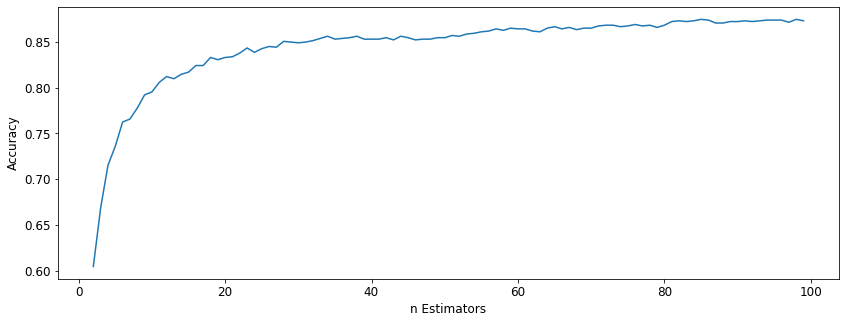

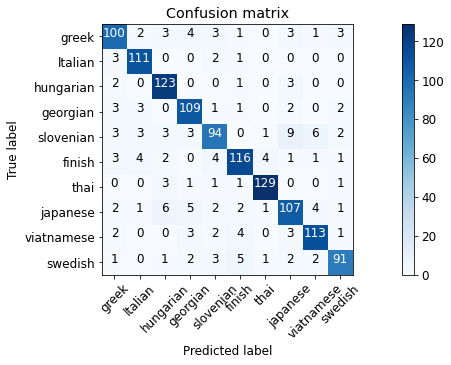

In [131]:
from sklearn.ensemble import RandomForestClassifier

results_forest=[]
for i in range(2,100):
    forest=RandomForestClassifier(random_state=42,n_estimators=i)
    forest.fit(x_train,y_train)
    results_forest.append(forest.score(x_test,y_test))
    
max_accuracy_forest=max(results_forest)
best_n_est=2+results_forest.index(max(results_forest))
print("Max Accuracy is {:.3f} on test dataset with {} estimators.\n".format(max_accuracy_forest,best_n_est))

plt.plot(np.arange(2,100),results_forest)
plt.xlabel("n Estimators")
plt.ylabel("Accuracy")


forest=RandomForestClassifier(random_state=42,n_estimators=best_n_est)
forest.fit(x_train,y_train)
print("Training Score: {:.3f}".format(forest.score(x_train,y_train)))
print("Test score: {:.3f}".format(forest.score(x_test,y_test)))

pred,true_y = plot_cnf(forest,x_test,y_test,dataset.label.unique())

In [132]:
print(classification_report(pred, true_y))

              precision    recall  f1-score   support

           0       0.83      0.84      0.84       119
           1       0.95      0.90      0.92       124
           2       0.95      0.87      0.91       141
           3       0.90      0.86      0.88       127
           4       0.76      0.84      0.80       112
           5       0.85      0.88      0.87       132
           6       0.95      0.95      0.95       136
           7       0.82      0.82      0.82       130
           8       0.88      0.89      0.89       127
           9       0.84      0.89      0.87       102

    accuracy                           0.87      1250
   macro avg       0.87      0.87      0.87      1250
weighted avg       0.88      0.87      0.88      1250



# Support Vector Machine

Training Score: 1.000
Test score: 0.956
---------------PERFORMANCE ANALYSIS FOR THE MODEL----------------

Real Test dataset labels: 
[4 7 2 ... 4 7 4]

Predicted Test dataset labels: 
[4 7 2 ... 4 7 4]


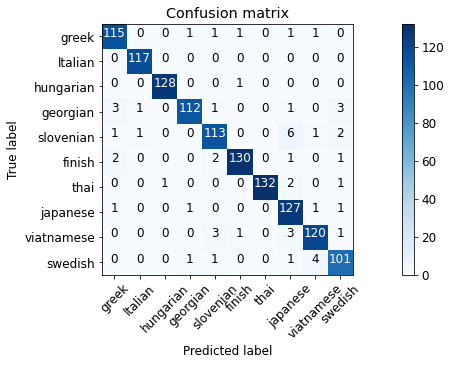

In [137]:
from sklearn.svm import SVC

svm=SVC(C=10,gamma=0.1)
svm.fit(x_train,y_train)
print("Training Score: {:.3f}".format(svm.score(x_train,y_train)))
print("Test score: {:.3f}".format(svm.score(x_test,y_test)))

pred_svm,true_y_svm = plot_cnf(svm,x_test,y_test,dataset.label.unique())

In [138]:
print(classification_report(pred_svm, true_y_svm))

              precision    recall  f1-score   support

           0       0.96      0.94      0.95       122
           1       1.00      0.98      0.99       119
           2       0.99      0.99      0.99       129
           3       0.93      0.97      0.95       115
           4       0.91      0.93      0.92       121
           5       0.96      0.98      0.97       133
           6       0.97      1.00      0.99       132
           7       0.97      0.89      0.93       142
           8       0.94      0.94      0.94       127
           9       0.94      0.92      0.93       110

    accuracy                           0.96      1250
   macro avg       0.96      0.96      0.96      1250
weighted avg       0.96      0.96      0.96      1250



# Neural Network

Training Score: 1.000
Test score: 0.910
---------------PERFORMANCE ANALYSIS FOR THE MODEL----------------

Real Test dataset labels: 
[4 7 2 ... 4 7 4]

Predicted Test dataset labels: 
[4 7 2 ... 4 7 4]


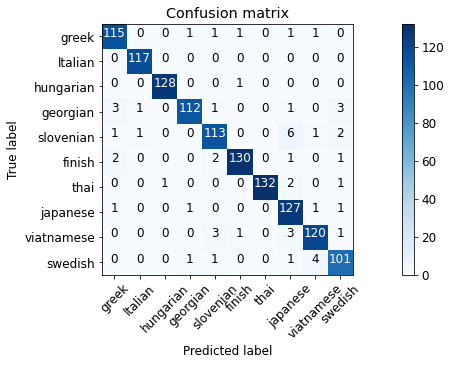

In [139]:
from sklearn.neural_network import MLPClassifier

neural=MLPClassifier(max_iter=400,random_state=2,hidden_layer_sizes=[100,100])
neural.fit(x_train,y_train)
print("Training Score: {:.3f}".format(neural.score(x_train,y_train)))
print("Test score: {:.3f}".format(neural.score(x_test,y_test)))

pred_nn,true_y_nn = plot_cnf(svm,x_test,y_test,dataset.label.unique())

In [140]:
print(classification_report(pred_nn, true_y_nn))

              precision    recall  f1-score   support

           0       0.96      0.94      0.95       122
           1       1.00      0.98      0.99       119
           2       0.99      0.99      0.99       129
           3       0.93      0.97      0.95       115
           4       0.91      0.93      0.92       121
           5       0.96      0.98      0.97       133
           6       0.97      1.00      0.99       132
           7       0.97      0.89      0.93       142
           8       0.94      0.94      0.94       127
           9       0.94      0.92      0.93       110

    accuracy                           0.96      1250
   macro avg       0.96      0.96      0.96      1250
weighted avg       0.96      0.96      0.96      1250

